# Lesson I 

## Probability mass functions

In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

## GSS

The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues.

* Annual sample of U.S population.
* Asks about demographics and beliefs about social and political issues.
* Widely used by policy makers and researchers.

<img src='pictures/gss.jpg' />

### Read the Data

The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this:

In [1]:
# Import pandas
import pandas as pd

gss = pd.read_hdf('datasets/gss.hdf5', 'gss')

gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


### Histogram

To get started with this dataset, let's look at the distribution of ``educ``, which records the number of years of education for each respondent.

First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable:

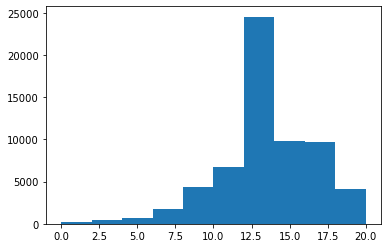

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

## PMF

An alternative is a *probability mass function*, or *PMF*, that contains the unique values in the dataset and how often each one appears. 

I've provided a class called ``Pmf`` that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. 

The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF.

```python
    pmf_educ = Pmf(educ, normalized=False)
    pmf_educ.head()

    # Output:
    0.0    566
    1.0    118
    2.0    292
    3.0    686
    4.0    746
    Name: educ, dtype: float64
```

The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.

You can use the bracket operator to look up a value in a ``Pmf`` and get a count.

```python
    pmf_educ[12]

    # Output:
    47689
```

This example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.

### Normalize

Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting ``normalize=True``; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1.

```python
    pmf_educ = Pmf(educ, normalized=True)
    pmf_educ.head()

    # Output:
    0.0    0.003663
    1.0    0.000764
    2.0    0.001890
    3.0    0.004440
    4.0    0.004828
    Name: educ, dtype: float64
```

Now if we use the bracket operator, the result is a fraction:

```python
    pmf_educ[12]
    # Output:
    0.308
```

In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

### Plot

The ``Pmf`` class provides a ``bar()`` method that plots a PMF as a bar chart. And here's what it looks like:

```python
    pmf_educ.bar(label='educ')
    plt.xlabel('Years of Education')
    plt.ylabel('PMF')
    plt.show()

    # Output:
```

<img src='pictures/pmfplot.jpg' width=400 />

In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

## Exercise

### Make a PMF

The GSS dataset has been pre-loaded for you into a DataFrame called ``gss``. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, ``'year'``, which represents the year each respondent was interviewed.

The ``Pmf`` class you saw in the video has already been created for you. You can access it outside of DataCamp via the ``empiricaldist`` library.

In [8]:
# Import PMF
from empyrical_dist import Pmf 

# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: year, Length: 62466, dtype: int64


### Plot a PMF

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable ``'age'`` contains respondents' age in years.

In [ ]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()